In [23]:
from google.colab import files
import pandas as pd # Often used to read Excel files

# 1. Trigger the file upload dialog
uploaded = files.upload()

# 2. Iterate through the uploaded files (in case you upload multiple)
for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

  # 3. Read the Excel file into a pandas DataFrame
  #    Make sure to use the correct filename
  try:
    df = pd.read_excel(filename)
    print(f"Successfully loaded '{filename}' into a pandas DataFrame.")
    print(df.head()) # Display the first few rows of the DataFrame
  except Exception as e:
    print(f"Error reading Excel file '{filename}': {e}")

Saving Laptop_price.csv to Laptop_price (1).csv
User uploaded file "Laptop_price (1).csv" with length 86049 bytes
Error reading Excel file 'Laptop_price (1).csv': Excel file format cannot be determined, you must specify an engine manually.


In [24]:
data=pd.read_csv('Laptop_price.csv')

In [25]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [27]:
data.shape

(1000, 7)

In [28]:
data['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [29]:
data.isna().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [30]:
data.duplicated().sum()

np.int64(0)

In [31]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [32]:
numeric_data=data.select_dtypes(include=['number'])



--- Correlation Matrix ---




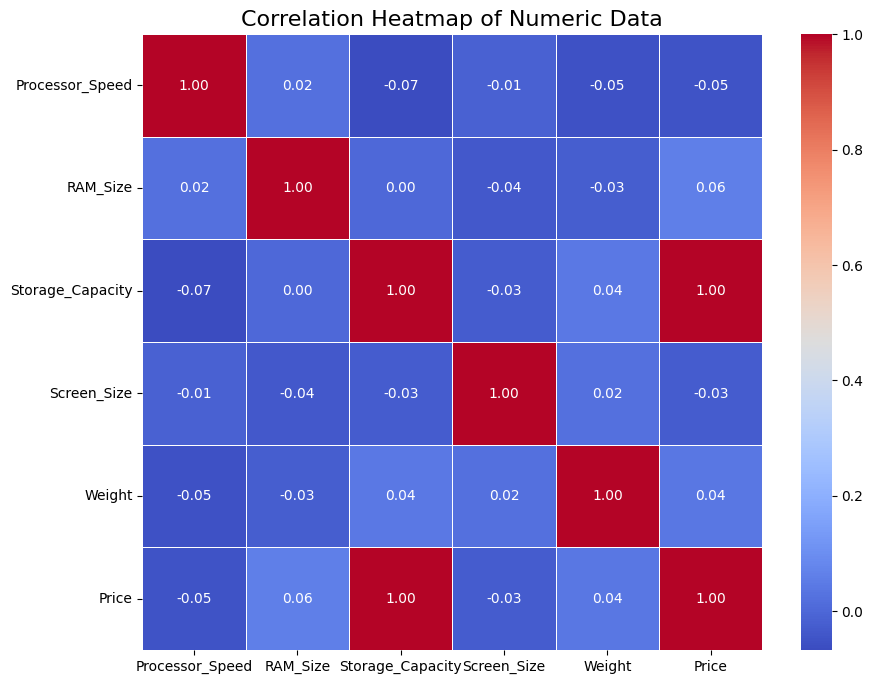

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = numeric_data.corr()

print("--- Correlation Matrix ---")
print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)

plt.title('Correlation Heatmap of Numeric Data', fontsize=16)
plt.show()

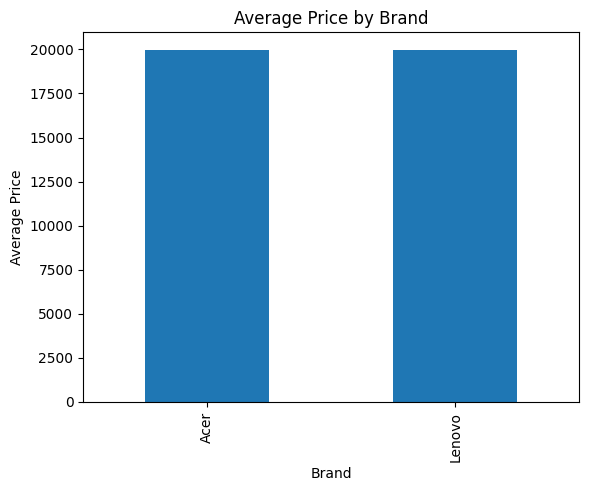

In [37]:
data.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(2).plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

In [38]:
data.groupby('RAM_Size')['Brand'].value_counts().reset_index()

,RAM_Size,Brand,count
0,4,HP,59
1,4,Acer,50
2,4,Dell,48
3,4,Asus,47
4,4,Lenovo,39
5,8,Asus,66
6,8,Lenovo,51
7,8,Acer,48
8,8,Dell,43
9,8,HP,38


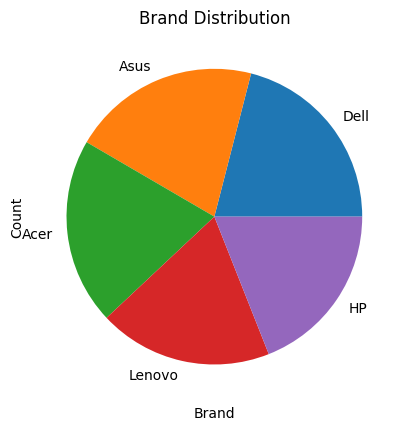

In [40]:
data['Brand'].value_counts().plot(kind='pie')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()